In [1]:
import os
import pprint
import numpy as np
import wandb
import torch
import torch.nn as nn
from torchsummary import summary
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *
from models import FCN
# Ensure reproducibility
torch.backends.cudnn.deterministic = True
seed_no = 108
np.random.seed(hash("improves reproducibility") % seed_no)
torch.manual_seed(hash("by removing stochasticity") % seed_no)
torch.cuda.manual_seed_all(hash("so runs are repeatable") % seed_no)
# Device configuration
device = torch.device("mps")            # for M1 silicon
print(device)

mps


In [9]:
rel_error = [93.20325, 93.80958, 93.3785, 93.43891, 91.62371, 93.23245, 92.37395, 92.29946, 88.00461, 92.94741, 82.51838, 89.58019, 93.33692, 93.39339, 91.29436, 91.591385, 93.04943, 93.0451, 86.97684, 90.758766, 93.55514, 92.69121, 92.27841, 93.857155, 93.705894, 93.61177, 93.46614, 93.38629, 87.775085, 93.13086, 93.24208, 93.81839, 93.34553, 87.02423, 93.65682, 92.92832, 93.30001, 93.73192, 91.53192, 92.95333, 93.228935, 92.50721, 93.550964, 93.19015, 93.20942, 92.50739, 86.78178, 93.24961, 93.45879, 89.48152, 92.89829, 87.96161, 93.33619, 93.12832, 92.37637, 90.88897, 91.47952, 93.81019, 92.81098, 92.68761, 92.660706, 91.0638, 93.256676, 93.69371, 93.18068, 92.61486, 89.63844, 93.7432, 92.29838, 93.27193, 93.114815, 92.39896, 90.432236, 93.74346, 93.42505, 93.22719, 93.158134, 93.29269, 92.7453, 93.33534, 93.10442, 90.28253, 93.38485, 83.35935, 92.61577, 93.466545, 93.225876, 93.64447, 93.39378, 93.023575, 91.095215, 93.00731, 93.391945, 92.93119, 92.684586, 90.97818, 88.944176, 93.540474, 88.52247, 93.113785, 91.858444, 91.33097, 88.50122, 93.32609, 93.40001, 93.48585, 92.94901, 91.78034, 89.71625, 92.331665, 94.96114, 90.092125, 93.15621, 94.56358, 93.740135, 86.95806, 86.88251, 91.11819, 88.90741, 84.04484, 93.21139, 91.9267, 93.52471, 93.284096, 93.53138, 91.6942, 92.68879, 93.258804, 93.47217, 92.91602, 91.71515, 93.5941, 93.67762, 93.90835, 92.94629, 93.80272, 93.01551, 92.900566, 89.27453, 93.2377, 93.10882, 90.66174, 93.66362, 90.89837, 93.86326, 93.75817, 93.511116, 93.13328, 92.60198, 93.40334, 93.322495, 89.84748, 93.415, 92.65557, 93.33961, 92.80408, 93.1487, 82.19245, 93.326744, 91.28386, 93.73052, 93.056816, 90.34224, 93.258804, 93.035706, 88.76617, 93.53394, 91.64335, 93.06973, 93.7803, 93.34856, 92.52774, 92.93306, 93.50685, 93.74464, 92.74636, 90.85949, 93.11074, 92.741646, 93.643814, 92.73071, 93.47654, 92.923454, 93.14504, 93.80956, 93.871735, 90.32938, 89.79826, 92.521286, 88.99762, 92.969986, 92.844185, 92.9223, 93.83233, 82.86424, 92.89663, 91.08796, 93.106606, 93.3395, 81.834465, 91.25518, 92.25467, 92.8557, 89.66332, 93.35013, 93.41628, 93.02927, 93.37433, 92.70305, 92.1732, 92.746574, 93.426094, 89.377106, 93.207565, 93.23617, 93.02019, 93.13781, 93.3833, 93.227234, 93.26708, 93.50635, 85.10351, 92.73648, 90.06591, 80.276, 93.62589, 89.37279, 93.209076, 91.70651, 93.8588, 93.48793, 92.880196, 93.50126, 89.01175, 92.93802, 93.96201, 93.319115, 93.22483, 93.45843, 93.16972, 93.10894, 93.535286, 93.3756, 92.97079, 91.46385, 92.99256, 93.2595, 93.08126, 89.375656, 91.90447, 92.94642, 86.19509, 92.75602, 87.8213, 93.4478, 92.24574, 93.18131, 92.6627, 87.82985, 90.39055, 93.747025, 89.61996, 93.567604, 93.70766, 93.240135, 90.54154, 92.01723, 91.07429, 93.449554, 93.50914, 92.85805, 94.34936, 90.76268, 93.342804, 93.57676, 93.15069, 93.24491, 92.89563, 93.12358, 93.25907, 93.60473, 93.38213, 93.3732, 92.09712, 90.73066, 93.77125, 89.45027, 90.840805, 92.78272, 93.671135, 92.33688, 92.89278, 92.16196, 93.156235, 93.34008, 89.753204, 93.59297, 93.0217, 93.431595, 92.939926, 93.39278, 93.28824, 93.65676, 92.41285, 92.891495, 90.920456, 92.74399, 91.17481, 84.69257, 93.511, 92.6858, 93.57126, 93.57527, 93.74313, 93.51343, 93.2233, 92.564514, 93.442726, 92.289604, 93.16369, 93.45138, 93.85453, 82.33293, 92.737404, 93.51968, 92.99987, 92.84759, 92.87994, 93.36753, 93.64884, 93.004074, 90.86461, 93.518906, 92.853004, 93.408875, 93.370895, 93.173515, 92.72092, 93.375496, 87.23797, 93.70402, 83.915764, 91.91332, 93.31636, 93.132675, 93.27349, 93.700874, 93.47433, 93.5617, 93.40503, 89.50615, 93.36259, 93.24987, 93.227425, 93.65396, 93.053116, 93.450165, 88.26018, 93.44116, 93.2862, 93.325066, 89.27915, 92.72001, 92.447136, 93.35617, 92.819695, 85.20445, 93.492065, 92.57904, 92.53438, 93.570915, 92.74802, 93.450096, 93.48007, 93.61686, 93.46782, 90.86116, 87.27848, 93.285484, 92.95947, 92.672844, 93.78407, 93.71429, 91.425835, 92.727196, 92.89764, 93.617195, 93.89339, 92.758354, 90.25187, 93.17163, 93.50276, 93.46967, 92.2608, 93.725655, 88.54125, 93.33226, 93.14746, 93.39729, 93.71582, 92.79711, 93.39066, 86.73386, 89.72652, 92.12492, 93.53974, 93.23641, 92.7933, 93.11269, 93.571365, 93.43435, 92.91946, 91.70381, 93.902084, 86.66698, 92.98712, 93.29113, 92.855995, 92.93756, 91.64525, 93.36129, 87.338844, 85.16123, 93.10302, 93.7171, 86.38963, 94.05257, 93.462364, 93.32083, 88.933235, 92.25368, 93.09404, 93.14509, 91.78495, 93.370964, 93.22505, 93.34278, 89.97832, 93.93377, 93.6056, 93.042725, 91.163284, 91.14833, 93.4208, 93.19954, 93.46235, 93.287766, 92.882385, 93.48315, 93.658356, 84.242165, 86.76939, 93.47344, 92.7315, 93.27575, 92.70673, 93.54893, 93.82543, 93.33062, 94.92757, 85.39231, 93.87703, 91.330986, 93.19813, 92.78575, 93.15181, 92.08531, 90.491585, 92.81015, 93.04832, 93.624794, 93.01418, 88.34204, 92.98127, 93.42076, 88.73663, 93.56133, 92.83512, 93.4382, 90.842316, 93.34319, 91.84276, 92.618576, 92.37465, 92.53452, 90.24706, 85.77142, 93.97983, 90.81669, 92.70539, 91.63221, 89.80725, 93.28056, 93.9884, 93.12896, 93.43688, 92.99083, 93.59624, 92.898705, 93.49901, 87.326195, 88.93391, 92.71357, 92.78784, 91.86052, 83.94933, 87.12444, 93.23096, 93.338196, 91.3748, 92.061295, 90.77076, 93.05135, 93.39748, 93.21621, 94.52842, 93.64033, 93.495346, 94.05146, 93.345955, 93.57048, 91.218025, 93.27847, 92.95697, 92.99901, 93.31273, 89.999176, 83.90288, 93.03585, 92.83179, 93.47173, 90.21772, 93.596695, 93.1743, 93.23973, 93.348274, 93.30544, 93.53946, 92.88518, 93.159775, 93.6168, 86.48048, 93.18624, 86.877914, 93.01466, 93.82031, 93.01842, 93.41941, 93.85617, 92.60754, 93.63818, 93.66595, 92.3007, 93.059006, 93.282486, 92.95992, 93.100624, 92.5473, 92.94886, 92.79821, 93.282394, 93.450356, 93.4652, 93.296745, 90.75194, 93.11173, 93.4276, 93.30336, 93.43866, 93.635414, 88.49695, 93.210686, 90.70917, 92.68802, 93.70072, 93.23049, 92.89879, 93.79964, 93.14776, 93.43284, 92.87664, 93.91446, 92.18059, 93.88182, 93.28065, 92.989784, 93.0304, 93.61777, 93.31421, 92.36766, 87.04447, 93.17545, 92.786224, 93.82059, 93.46921, 93.4344, 87.25243, 88.512085, 93.75835, 92.86519, 92.535805, 92.41257, 93.13625, 93.033455, 94.39565, 93.839554, 94.556404, 93.39697, 93.160194, 93.2235, 92.74229, 87.981415, 93.37037, 93.1016, 85.562195, 93.6405, 92.548195, 88.77897, 93.161156, 93.544365, 94.01913, 93.54157, 91.67796, 89.92914, 92.93837, 93.45526, 92.51106, 93.47074, 93.69326, 92.98, 93.45793, 93.02135, 92.666794, 93.60825, 83.10964, 91.61613, 89.79965, 92.73051, 85.43752, 93.386765, 89.44705, 93.3197, 93.5164, 93.906075, 91.857475, 92.993195, 93.532974, 92.15975, 92.902145, 93.07073, 93.155396, 93.5296, 93.88733, 91.64247, 92.84518, 93.37382, 93.25774, 92.84006, 88.72113, 93.67108, 89.49271, 92.6138, 92.5907, 93.20495, 91.779854, 92.9662, 93.135605, 93.33027, 91.61242, 93.418655, 91.34268, 93.36105, 93.260124, 87.64511, 93.78381, 93.526596, 92.99138, 93.81639, 83.65732, 92.92722, 93.47763, 93.779655, 93.56133, 86.27602, 93.503555, 88.312836, 93.41442, 93.57621, 92.67762, 93.6107, 91.918594, 94.08886, 86.644585, 93.05906, 93.2744, 93.461975, 93.58967, 93.37425, 92.29107, 93.514755, 91.55447, 92.23293, 93.021355, 93.9538, 93.005775, 86.803764, 93.4845, 93.325294, 93.51735, 93.1937, 93.32051, 93.16829, 91.3533, 88.43286, 90.62155, 92.98974, 93.367546, 93.49343, 91.78059, 91.71426, 93.56156, 93.28787, 93.05897, 92.19716, 91.4859, 93.117386, 93.18342, 93.52544, 93.49091, 87.11866, 88.689674, 93.679924, 93.30266, 90.92154, 91.77976, 89.73354, 91.69347, 92.686226, 92.37439, 93.11077, 93.156364, 93.170784, 93.069595, 93.51216, 93.000984, 93.22686, 93.392365, 93.24611, 90.7702, 93.29974, 92.728935, 92.61898, 92.71814, 93.11779, 93.87476, 93.46979, 93.3655, 93.16674, 93.739655, 90.476746, 92.8712, 89.427734, 93.17993, 92.83635, 93.39376, 93.40025, 93.54079, 93.55394, 89.1245, 92.97443, 93.31416, 91.33027, 92.9064, 92.49018, 91.90774, 93.60005, 93.08232, 92.23019, 93.58368, 92.8915, 93.352104, 93.67598, 93.29956, 87.15495, 93.01396, 93.3994, 93.70832, 93.29528, 92.25534, 93.371315, 91.36084, 93.31924, 92.60115, 85.82658, 92.82702, 93.29315, 93.34111, 93.575714, 92.937195, 92.972946, 93.558136, 93.56667, 93.57021, 89.4309, 93.52668, 93.22081, 92.98576, 93.25216, 93.020775, 91.63159, 93.33764, 93.59435, 93.12528, 91.81141, 93.18569, 93.007126, 93.02857, 92.78572, 93.126434, 93.28616, 93.30907, 89.913826, 93.1277, 93.25338, 93.381256, 88.82084, 93.22299, 93.77192, 92.83769, 93.5625, 93.10622, 93.39696, 93.63443, 93.53384, 92.41835, 88.73367, 91.5244, 89.80261, 93.459114, 93.39957, 86.05995, 93.29773, 93.67134, 93.2401, 93.27065, 93.49432, 87.15315, 93.26579, 92.991135, 88.33555, 93.16067, 90.368034, 92.383644, 92.6834, 93.4311, 93.52957, 89.79933, 93.42129, 87.56219, 92.98786, 93.84494, 91.51554, 88.82917, 92.89798, 93.589554, 88.90556, 92.54449, 86.99313, 93.04707, 93.750694, 93.07927, 93.83109, 92.80412, 93.65945, 93.6952, 93.006516, 91.62766, 93.48963, 93.23642, 93.525856, 93.50259, 93.73302, 92.80488, 90.794586, 93.43536, 93.14263, 88.63019, 89.532745, 93.56601, 93.23645, 90.500015, 92.256546, 93.864555, 93.42574, 93.44044, 92.79423, 92.58871, 90.4625, 93.068726, 92.7788, 87.78361, 93.1027, 92.72008, 92.257286, 92.97878, 92.54448, 93.750725, 92.698235, 89.20262, 92.58571, 93.29904, 90.21285, 93.41431, 92.81468, 90.67802, 93.19359, 93.346344, 93.25882, 93.21327, 92.81346, 93.36108, 93.6804]

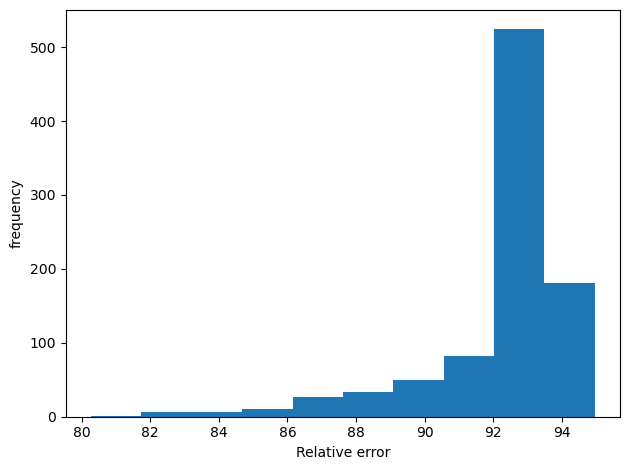

In [11]:
fig, ax = plt.subplots()
ax.hist(rel_error)
plt.xlabel("Relative error")
plt.ylabel("frequency")
plt.tight_layout()

In [ ]:
# ==============================================================================
# Hyperparameters and Data loader
# ==============================================================================
# Loading the data
n_data = 4608
m_field = np.load("data/permeability.npy")[:n_data, :, :]
u_field = np.load("data/pressure.npy")[:n_data, :, :]

# Normalize the data between -1 and 1
m_field = ((m_field - m_field.min())/(m_field.max()-m_field.min()))*2 - 1.
u_field = ((u_field - u_field.min())/(u_field.max()-u_field.min()))*2 - 1.

# Hyperparameters
batch_size = 256
#lr = 0.01
num_epochs = 40
log_freq = int(0.1 * num_epochs)
n_train = int(0.9 * m_field.shape[0])

# Data loader
train_m_field = torch.from_numpy(m_field[:n_train, :, :]).float().to(device)
train_u_field = torch.from_numpy(u_field[:n_train, :, :]).float().to(device)
val_m_field = torch.from_numpy(m_field[n_train:, :, :]).float().to(device)
val_u_field = torch.from_numpy(u_field[n_train:, :, :]).float().to(device)
train_dataset = torch.utils.data.TensorDataset(train_m_field, train_u_field)
test_dataset = torch.utils.data.TensorDataset(val_m_field, val_u_field)

#wandb hyperparameter dictionary
sweep_configuration = {
    "method": "grid",
    "name": "grid_search",
    "metric": {"goal": "minimize", "name": "val_loss"},
    "parameters": 
    {
        "n_channels": {"values": [4, 16, 128]},
        "reg_param": {"values": [0.0]},
        "lr": {"values": [0.005]},
        "batch_size": {"values": [8, 256, 1024]}
     }
}
pprint.pprint(sweep_configuration)
project_name = "cme216_wandb_demo"
group_name = "grid_search_hw"
sweep_id = wandb.sweep(sweep_configuration, project=project_name)



import time
t1 = time.time()
# ==============================================================================
# Training
# ==============================================================================
# Train the model
def train(config=None):
    # Initialize the new wandb run
    wandb.init(config=config, project=project_name, group=group_name) 
    config = wandb.config
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                             batch_size=config.batch_size,
                                                shuffle=True)
    total_step = len(train_loader)
    loss_list = []


    # Model, Loss, and Optimizer
    model = FCN(config.n_channels).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.reg_param)
    for epoch in range(num_epochs):
        for i, (train_x, train_y) in enumerate(train_loader):
            # Run the forward pass
            model.train()
            output = model(train_x.unsqueeze(1))
            loss = criterion(output, train_y.unsqueeze(1))
            loss_list.append(loss.item())
            # Backprop and perform Adam optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch+1) % log_freq == 0:
            # Calculate the validation loss
            model.eval()
            with torch.no_grad():
                val_u_field_pred = model(val_m_field.unsqueeze(1))                    
                val_loss = criterion(val_u_field_pred, val_u_field.unsqueeze(1))
            
            plot_perm_and_temp(val_m_field.detach().cpu().numpy().squeeze(), 
                                val_u_field.detach().cpu().numpy().squeeze(), 
                                val_u_field_pred.detach().cpu().numpy().squeeze(), epoch)
            diff_ = (val_u_field_pred - val_u_field.unsqueeze(1)).detach().cpu().numpy().squeeze()
            diff_vec = np.reshape(diff_, (diff_.shape[0], -1))
            val_l2_pt_error = np.mean(np.linalg.norm(diff_vec, axis=1) / np.linalg.norm(np.reshape(val_u_field.detach().cpu().numpy(), (val_u_field.shape[0], -1)), axis=1), axis=0) * 100
            
            wandb.log({"val_loss": val_loss.item(), "train_loss": loss.item(), "val_rel_error_pt": val_l2_pt_error, "epoch": epoch})
            print (f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], \
                    Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, \
                    Val. error (in %) = {val_l2_pt_error:.2f}%")

    # Save the model checkpoint (optional)
    save_path = os.path.join(wandb.run.dir, "model.ckpt")
    torch.save(model.state_dict(), save_path)

wandb.agent(sweep_id, train)
t2 = time.time()
print(f"Total time taken: {t2-t1}")
wandb.finish()